# Mall Customer Segmentation
*Regresi√≥n log√≠stica*

## OBJETIVO ##
- Aplicar algoritmos de Machine
Learning no supervisado seg√∫n el problema, empleando t√©cnicas
de Clustering

## DATOS ##
Los datos son obtenidos de https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python  

##  DESARROLLO
A continuaci√≥n se realizar√° las actividades propuestas para la entrega de la Tarea

### 1. Exploraci√≥n y Perfilamiento de datos

**Cargue de librerias y datos**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
!pip install kneed
from kneed import KneeLocator

**Lectura de datos**

In [3]:
data_raw = pd.read_csv('/content/Mall_Customers.csv') # Ruta de acceso a los datos
data_raw.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

**Dimensiones e informaci√≥n del DataFrame**

In [4]:
#Dimensi√≥n del DataFrame
data_raw.shape

(200, 5)

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data_raw.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

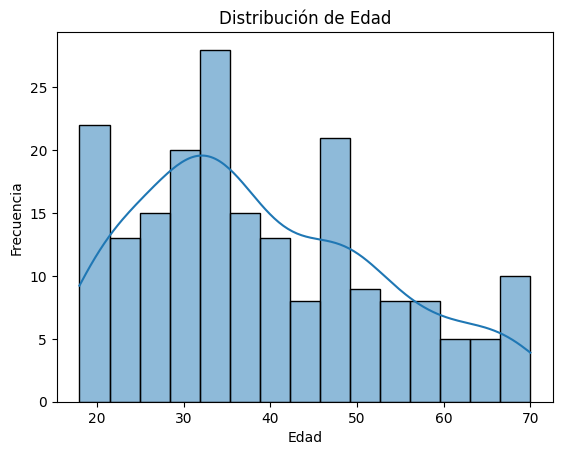

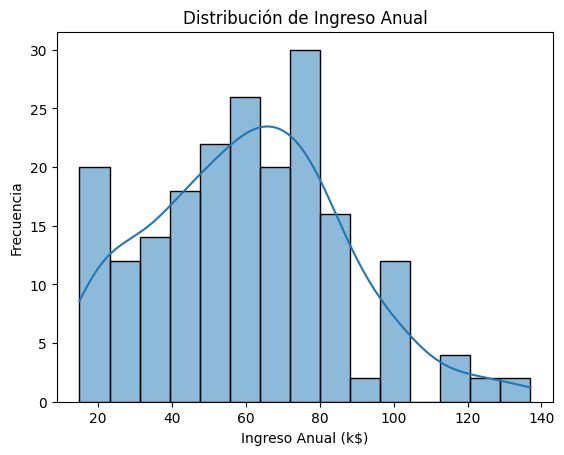

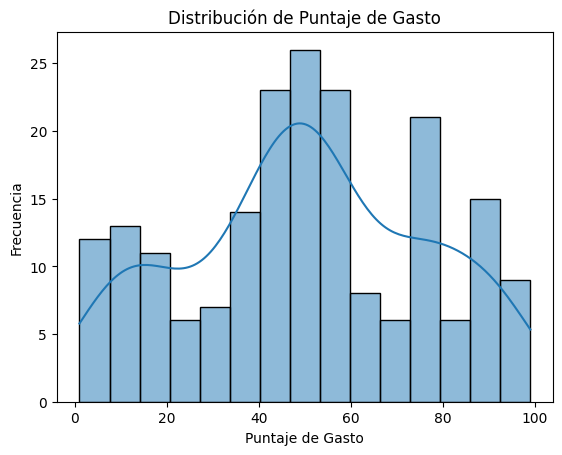

In [7]:
# Histograma de la edad
sns.histplot(data_raw['Age'], bins=15, kde=True)
plt.title('Distribuci√≥n de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del ingreso anual
sns.histplot(data_raw['Annual Income (k$)'], bins=15, kde=True)
plt.title('Distribuci√≥n de Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del puntaje de gasto
sns.histplot(data_raw['Spending Score (1-100)'], bins=15, kde=True)
plt.title('Distribuci√≥n de Puntaje de Gasto')
plt.xlabel('Puntaje de Gasto')
plt.ylabel('Frecuencia')
plt.show()


**Datos ausentes y duplicados** Para el perfilamiento de datos se examina la calidad de los datos por medio de los valores faltantes y duplicados

In [8]:
data_raw.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data_raw.duplicated().sum()

np.int64(0)

Explorando la relaci√≥n entre variables

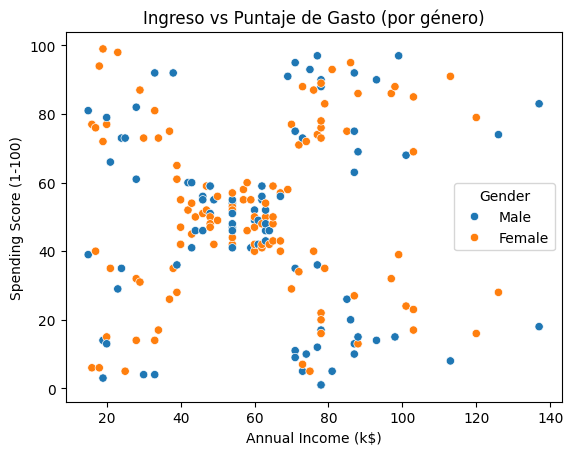

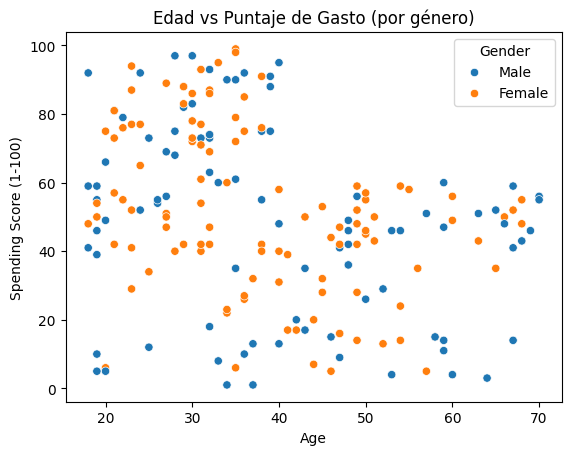

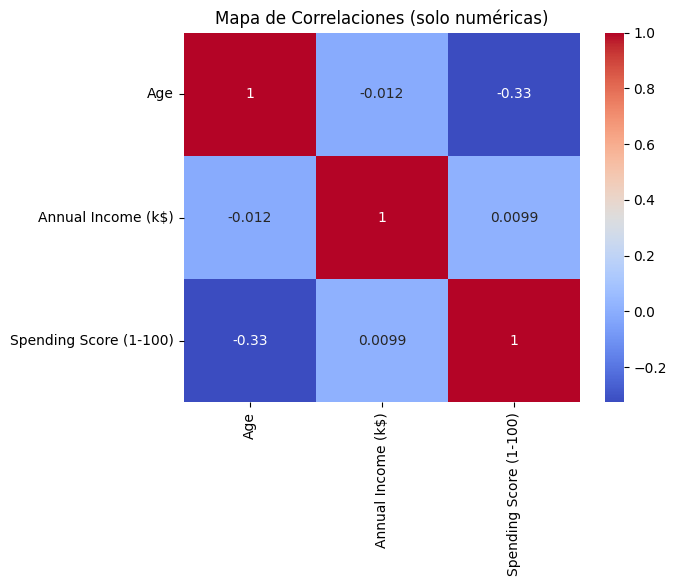

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [10]:
# Relaci√≥n entre ingreso y puntaje de gasto
sns.scatterplot(data=data_raw, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Ingreso vs Puntaje de Gasto (por g√©nero)')
plt.show()

# Relaci√≥n entre edad y puntaje de gasto
sns.scatterplot(data=data_raw, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Edad vs Puntaje de Gasto (por g√©nero)')
plt.show()

# Mapa de calor
corr = data_raw.drop(['CustomerID', 'Gender'], axis=1).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlaciones (solo num√©ricas)')
plt.show()
print (corr)



**Comparar gasto e ingreso por g√©nero**

<ipython-input-11-3ea4176e31e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_raw, x='Gender', y='Annual Income (k$)', palette='Set2',legend=False)


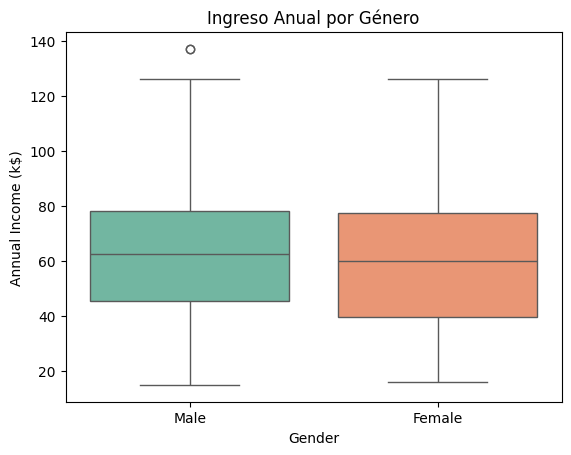

<ipython-input-11-3ea4176e31e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_raw, x='Gender', y='Spending Score (1-100)', palette='Set3',legend=False)


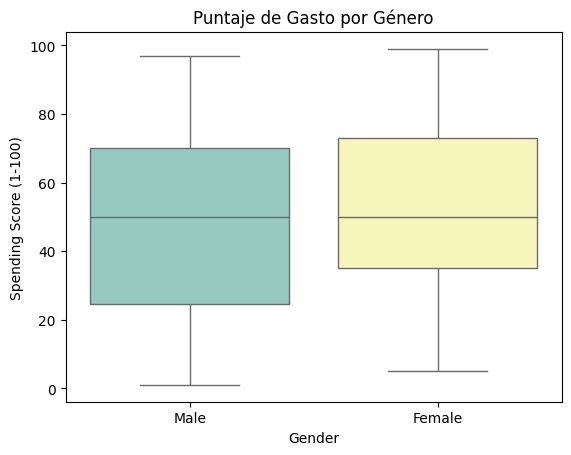

In [11]:
# Ingreso anual por g√©nero
sns.boxplot(data=data_raw, x='Gender', y='Annual Income (k$)', palette='Set2',legend=False)
plt.title('Ingreso Anual por G√©nero')
plt.show()

# Puntaje de gasto por g√©nero
sns.boxplot(data=data_raw, x='Gender', y='Spending Score (1-100)', palette='Set3',legend=False)
plt.title('Puntaje de Gasto por G√©nero')
plt.show()

Se puede observar que no hay relaciones lineales fuertes, lo que es ideal para aplicar algoritmos de clustering no supervisado.

Las personas no se agrupan por ingreso o edad de manera obvia, por lo que segmentar con K-means o clustering jer√°rquico puede revelar grupos ocultos en el comportamiento de los clientes.

El Spending Score es clave para el clustering, ya que muestra variabilidad clara frente a otras variables.

**Posibles valores at√≠picos**

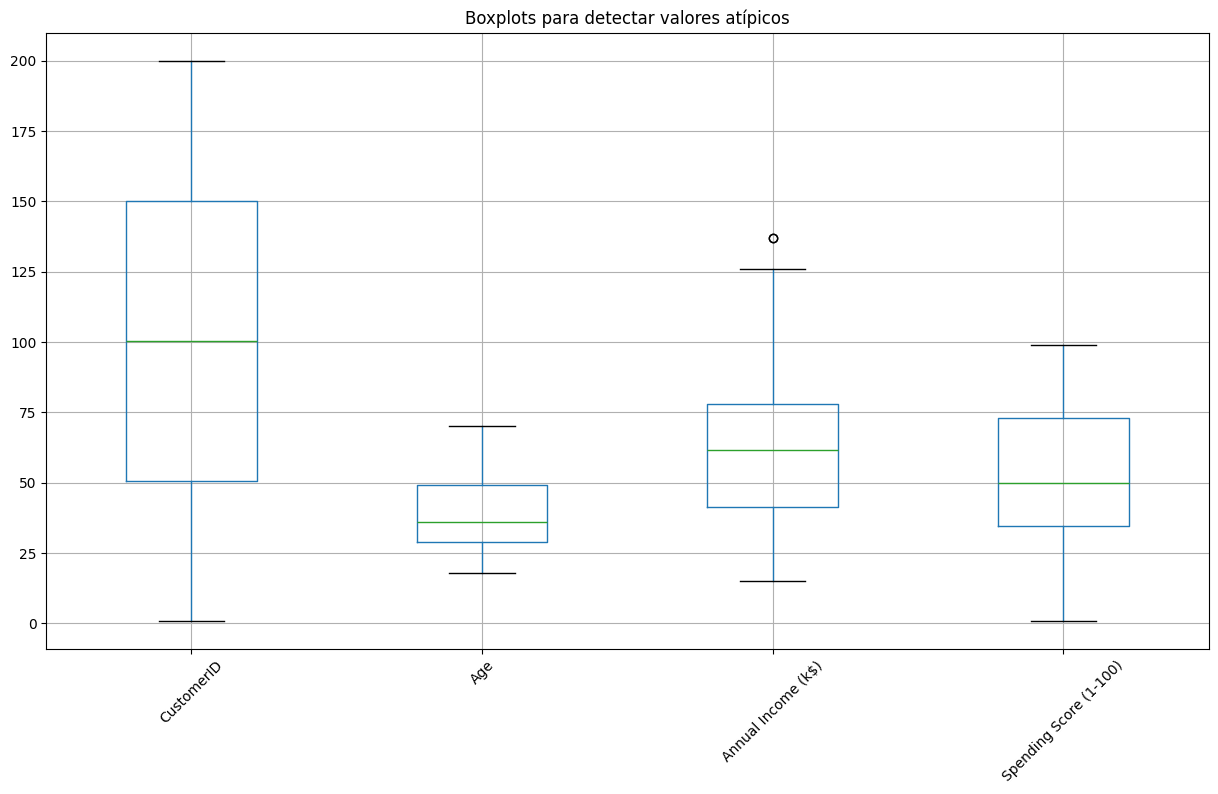

In [12]:
data_raw.boxplot(figsize=(15,8), rot=45)
plt.title("Boxplots para detectar valores at√≠picos")
plt.show()


La exploraci√≥n inicial del dataset muestra que la cantidad de hombres y mujeres en el conjunto de datos est√° relativamente balanceada, con una ligera predominancia de un g√©nero (seg√∫n el gr√°fico de barras).

Esto indica que el g√©nero podr√≠a ser una variable relevante, pero no dominante, para segmentar clientes.El ingreso anual est√° bastante distribuido entre 15k y 137k d√≥lares.

No se observa una correlaci√≥n clara entre el ingreso y el puntaje de gasto (correlaci√≥n ‚âà 0.01), lo que indica que mayores ingresos no implican mayor gasto necesariamente.

La mayor√≠a de los clientes se encuentran en un rango de edad entre 20 y 50 a√±os.

Existe una correlaci√≥n negativa moderada entre edad y gasto (-0.33), lo que sugiere que los clientes m√°s j√≥venes tienden a gastar m√°s en promedio.

Presenta una distribuci√≥n amplia, con algunos clientes con valores muy bajos y otros con valores muy altos.

Es una variable clave para segmentar clientes, ya que muestra mucha variabilidad y diferencia de comportamiento.

Baja correlaci√≥n entre las variables num√©ricas, lo cual es positivo para aplicar clustering: se espera que los grupos descubiertos por los algoritmos no sean triviales o evidentes.

Algunos grupos visuales ya parecen formarse, especialmente en el gr√°fico de Annual Income vs. Spending Score. Esto indica que es probable que el clustering encuentre segmentos bien definidos.

## 2. Preparaci√≥n de los datos

Teniendo en cuenta que no existe ni valores nulos ni valores repetidos se realizar√° lo siguiente de acuerdo a la observaci√≥n inicial de los datos y a la documentaci√≥n de la data para el preprocesamiento de datos se realizar√° :
- Eliminar columnas no √∫tiles: CustomerID no aporta informaci√≥n relevante para el clustering:

- Codificaci√≥n de variables categ√≥ricas: K-means y clustering jer√°rquico funcionan mejor con variables num√©ricas compactas

-  Normalizaci√≥n / Escalado



In [13]:
data = data_raw.copy()

In [14]:
#Eliminar columnas no √∫tiles
df=data.drop('CustomerID', axis=1)

**Codificaci√≥n**

In [15]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(data['Gender'])  # Male = 1, Female = 0 (por defecto)


**Normalizaci√≥n**

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [17]:
df_final = pd.DataFrame(df_scaled, columns=df.columns)
# Verificando  que no est√© 'CustomerID'
print(df_final.columns)
df_final.head()

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980

## 3. Selecci√≥n de caracter√≠stica
De acuerdo a la exploraci√≥n inicial se puedo observar que las correlaciones eran correlaciones eran:


Age   :                 -0.33 con Spending Score  
Annual Income (k$)   :    0.01 con Spending Score  
Gender        :            se debe analizar por separado
Esto  indica que:

Spending Score y Age tienen cierta relaci√≥n negativa.

Annual Income tiene muy poca correlaci√≥n con otros, pero es importante.

Gender puede influir, pero podr√≠a no ser esencial para el agrupamiento si se desea una segmentaci√≥n puramente socioecon√≥mica/comportamental.

En este caso se va a analizar todas las variables

## 4. Entrenar el modelo con ajuste de hiperpar√°metros.

 K-Means Clustering:El hiperpar√°metro m√°s importante de K-Means es k = n√∫mero de cl√∫steres.


Clustering Jer√°rquico:En este modelo no se define k directamente al principio, pero se puede visualizar los cl√∫steres con un dendrograma y luego decidir cu√°ntos cortar

**Kmeans**

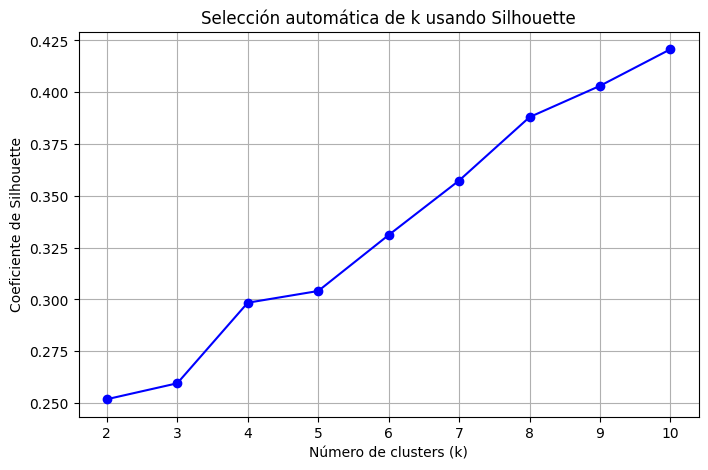

El mejor n√∫mero de clusters seg√∫n Silhouette es: 10


In [18]:
X = df_final.copy()
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Gr√°fica
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Selecci√≥n autom√°tica de k usando Silhouette')
plt.grid(True)
plt.show()

# Mejor k
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"El mejor n√∫mero de clusters seg√∫n Silhouette es: {best_k}")

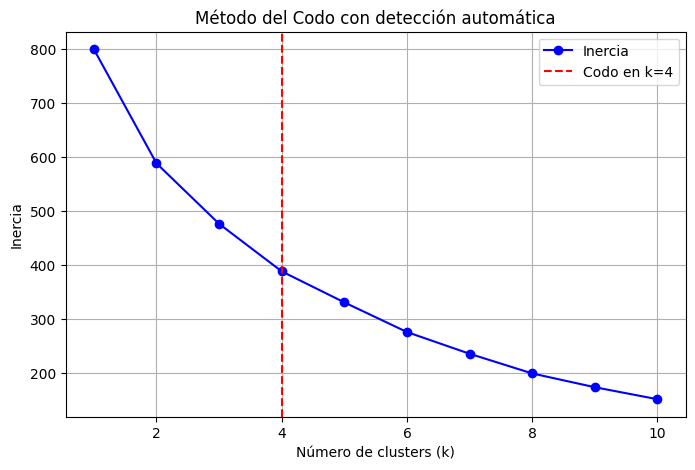

El mejor n√∫mero de clusters seg√∫n el m√©todo del codo es: 4


In [19]:


inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Encontrar el "codo"
kneedle = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
best_k_elbow = kneedle.knee

# Gr√°fica con el codo marcado
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-', label='Inercia')
plt.axvline(x=best_k_elbow, color='red', linestyle='--', label=f'Codo en k={best_k_elbow}')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Inercia')
plt.title('M√©todo del Codo con detecci√≥n autom√°tica')
plt.legend()
plt.grid(True)
plt.show()

print(f"El mejor n√∫mero de clusters seg√∫n el m√©todo del codo es: {best_k_elbow}")


M√©todo del codo:k=	4	Punto donde agregar m√°s clusters ya no reduce significativamente la inercia (compactaci√≥n).
Silhouette: k= 10	Calidad del agrupamiento (separaci√≥n entre clusters + cohesi√≥n interna).

**Pipeline** Anteriormente se observ√≥ el numero de clusters de acuerdo a los m√©todos esto da una idea del rango en el cual se va a tomar el mejor k, para realizar el entrenamiento de los modelos se realizar√° un pipeline para cada uno.

In [20]:


def kmeans_pipeline(X, k_range=range(2, 11)):
    results = []

    for k in k_range:
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(X)

        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)

        results.append({
            'k': k,
            'silhouette': silhouette,
            'calinski': calinski,
            'model': model,
            'labels': labels
        })

    # Convertir a DataFrame
    scores_df = pd.DataFrame(results).drop(columns='model')

    # Visualizar m√©tricas
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.lineplot(data=scores_df, x='k', y='silhouette', ax=ax[0])
    ax[0].set_title('Silhouette Score por k')
    sns.lineplot(data=scores_df, x='k', y='calinski', ax=ax[1])
    ax[1].set_title('Calinski-Harabasz Score por k')
    plt.show()

    # Seleccionar el mejor modelo por Silhouette
    best_model = max(results, key=lambda x: x['silhouette'])
    print(f"Mejor k (Silhouette): {best_model['k']:.0f}")

    # Visualizar clusters
    X_vis = X.copy()
    X_vis['Cluster'] = best_model['labels']
    sns.scatterplot(data=X_vis, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
    plt.title(f'KMeans con k={best_model["k"]}')
    plt.show()

    return best_model['model'], best_model['labels'], scores_df


In [21]:
def hierarchical_pipeline(X, k_range=range(2, 11), linkage='ward'):
    results = []

    for k in k_range:
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model.fit_predict(X)

        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)

        results.append({
            'k': k,
            'silhouette': silhouette,
            'calinski': calinski,
            'model': model,
            'labels': labels
        })

    # Convertir resultados a DataFrame
    scores_df = pd.DataFrame(results).drop(columns='model')

    # Visualizaci√≥n de m√©tricas
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.lineplot(data=scores_df, x='k', y='silhouette', ax=ax[0])
    ax[0].set_title('Silhouette Score por k (Hierarchical)')
    sns.lineplot(data=scores_df, x='k', y='calinski', ax=ax[1])
    ax[1].set_title('Calinski-Harabasz Score por k (Hierarchical)')
    plt.show()

    # Mejor k por Silhouette
    best_model = max(results, key=lambda x: x['silhouette'])
    print(f"Mejor k (Silhouette - Hierarchical): {best_model['k']:.0f}")

    # Visualizaci√≥n de clusters
    X_vis = X.copy()
    X_vis['Cluster'] = best_model['labels']
    sns.scatterplot(data=X_vis, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
    plt.title(f'Hierarchical Clustering con k={best_model["k"]} (linkage={linkage})')
    plt.show()

    return best_model['model'], best_model['labels'], scores_df

## 5  Evaluaci√≥n del modelo
Se va medir el rendimiento del modelo con la m√©trica de Silhouette

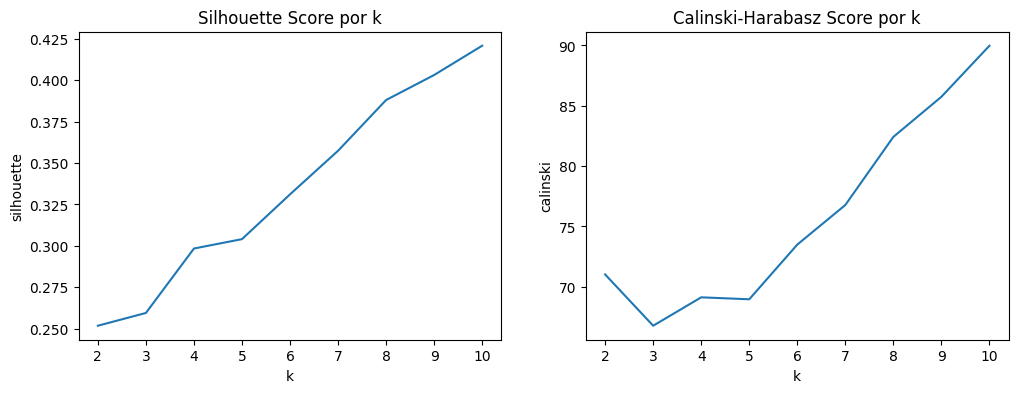

Mejor k (Silhouette): 10


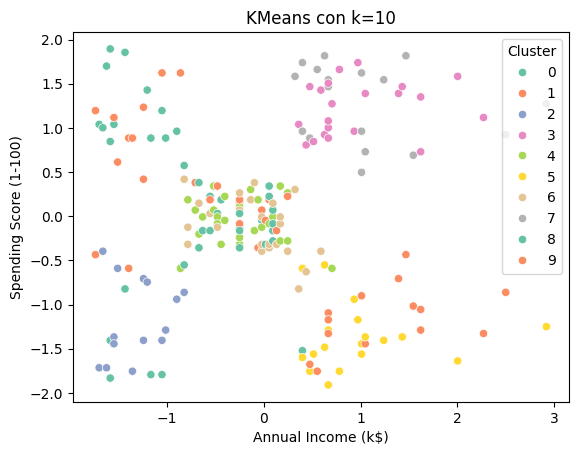

K-Means Evaluation:
- Silhouette Score: 0.4208
- Calinski-Harabasz Index: 89.98


In [22]:
# Ajustar el pipeline y predecir

best_kmeans_model, kmeans_labels, _ = kmeans_pipeline(df_final.copy())

kmeans_labels = best_kmeans_model.labels_ # Get labels directly from the trained KMeans model

# M√©tricas
print("K-Means Evaluation:")
print(f"- Silhouette Score: {silhouette_score(df_final.copy(), kmeans_labels):.4f}") # Corrected the function call to silhouette_score
print(f"- Calinski-Harabasz Index: {calinski_harabasz_score(df_final.copy(), kmeans_labels):.2f}")

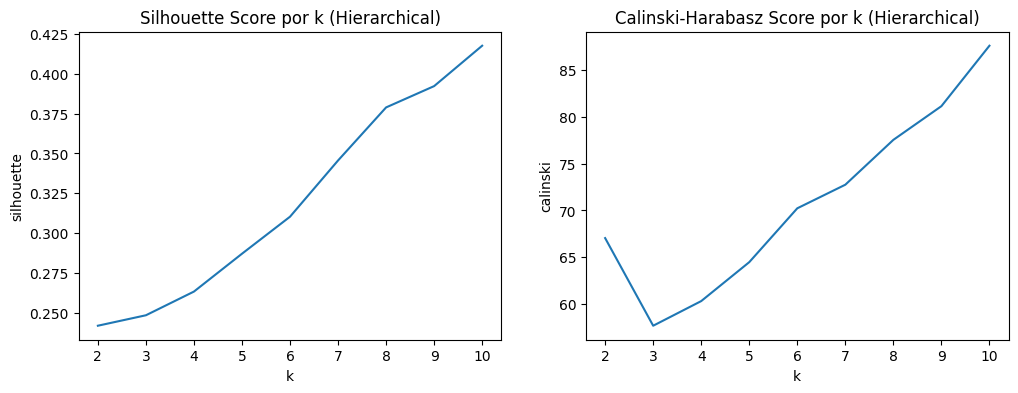

Mejor k (Silhouette - Hierarchical): 10


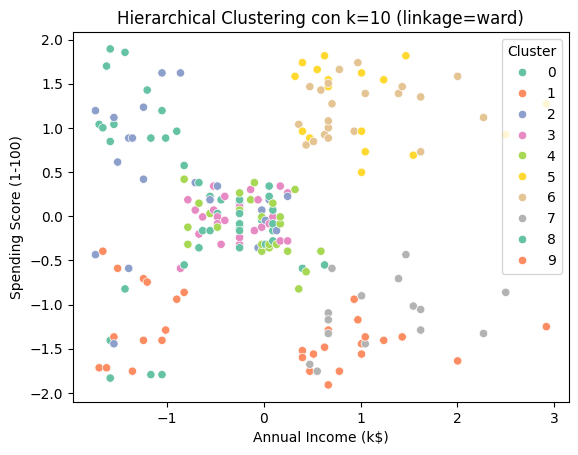

Hierarchical Clustering Evaluation:
- Silhouette Score: 0.4176
- Calinski-Harabasz Index: 87.61


In [23]:
# Ajustar el pipeline y predecir
best_hierarchical_model, hierarchical_labels, _ = hierarchical_pipeline(df_final.copy())  # Assuming df_final contains your features


hierarchical_labels = best_hierarchical_model.labels_

# M√©tricas
print("Hierarchical Clustering Evaluation:")
print(f"- Silhouette Score: {silhouette_score(df_final.copy(), hierarchical_labels):.4f}")  # Use df_final here
print(f"- Calinski-Harabasz Index: {calinski_harabasz_score(df_final.copy(), hierarchical_labels):.2f}")  # Use df_final here

In [24]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 0.8331


## 6. Visualizaci√≥n de los resultados



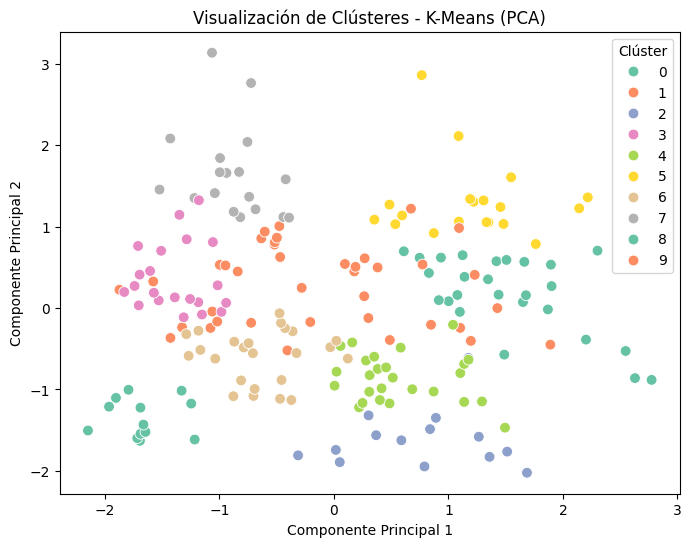

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducci√≥n a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizaci√≥n para K-Means
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set2', s=60)
plt.title('Visualizaci√≥n de Cl√∫steres - K-Means (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cl√∫ster')
plt.show()

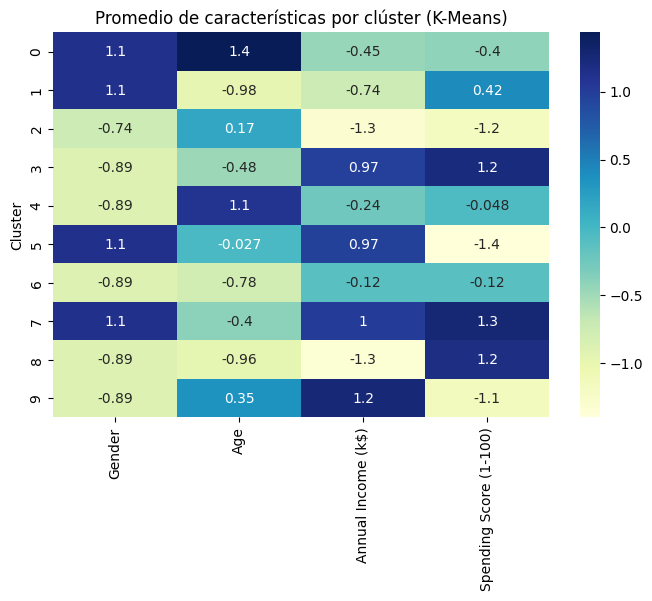

Gender       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                
0        1.128152  1.435058           -0.452983               -0.401952
1        1.128152 -0.976027           -0.737052                0.416038
2       -0.742508  0.169677           -1.316409               -1.166865
3       -0.886405 -0.477932            0.972848                1.221585
4       -0.886405  1.098306           -0.241583               -0.048079
5        1.128152 -0.027007            0.967012               -1.397168
6       -0.886405 -0.781539           -0.122142               -0.119570
7        1.128152 -0.399900            1.013441                1.260407
8       -0.886405 -0.960846           -1.330880                1.177786
9       -0.886405  0.354220            1.249122               -1.147454

In [33]:

clustered_data = X.copy()
clustered_data['Cluster'] = kmeans_labels
mean_values = clustered_data.groupby('Cluster').mean()

plt.figure(figsize=(8,5))
sns.heatmap(mean_values, annot=True, cmap='YlGnBu')
plt.title("Promedio de caracter√≠sticas por cl√∫ster (K-Means)")
plt.show()
mean_values

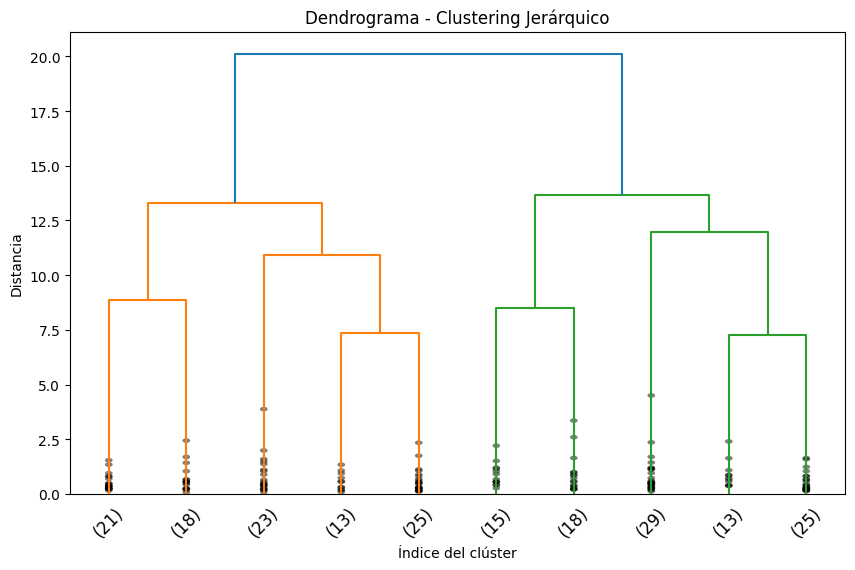

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Dendrograma - Clustering Jer√°rquico')
plt.xlabel('√çndice del cl√∫ster')
plt.ylabel('Distancia')
plt.show()


<ipython-input-28-f7be1b7fc855>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')


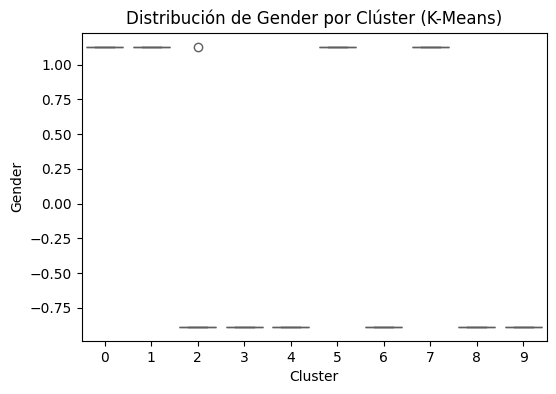

<ipython-input-28-f7be1b7fc855>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')


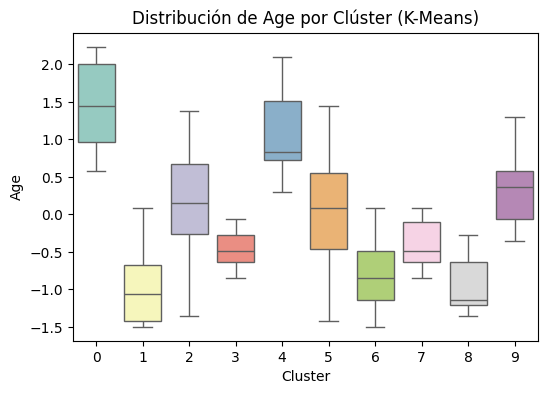

<ipython-input-28-f7be1b7fc855>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')


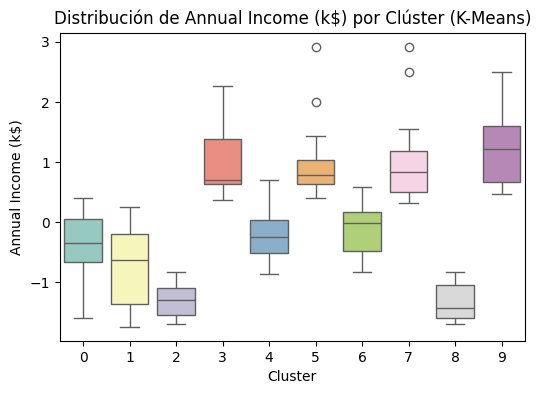

<ipython-input-28-f7be1b7fc855>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')


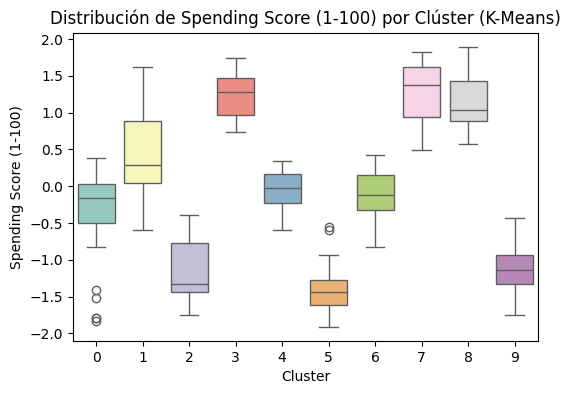

In [28]:
import matplotlib.pyplot as plt
clustered_data = X.copy()
clustered_data['Cluster'] = kmeans_labels

for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')
    plt.title(f'Distribuci√≥n de {col} por Cl√∫ster (K-Means)')
    plt.show()

## 7. Analisis de Resultados:



Tras aplicar t√©cnicas de aprendizaje no supervisado al conjunto de datos de segmentaci√≥n de clientes del centro comercial, se entrenaron y evaluaron dos modelos de clustering: K-Means y Clustering Jer√°rquico. A continuaci√≥n se presentan los principales hallazgos:

**N√∫mero √≥ptimo de cl√∫steres**
El n√∫mero de cl√∫steres recomendado por el m√©todo del Coeficiente de Silhouette fue 10.

En cambio, el m√©todo del Codo  suger√≠a un valor √≥ptimo de 4, mostrando que no siempre hay consenso entre diferentes m√©tricas, lo cual es com√∫n en clustering no supervisado.

Se opt√≥ por seguir el valor de k = 10 para obtener grupos m√°s espec√≠ficos y bien definidos.

- ## **KMEANS**
Silhouette Score:	0.4208

  Calinski-Harabasz Index:	89.98

  Davies-Bouldin Index:	0.8331

  üîπ Silhouette Score: indica una estructura de cl√∫steres moderadamente buena. Los cl√∫steres no est√°n perfectamente separados, pero tampoco se solapan demasiado.

  üîπ √çndice de Calinski-Harabasz: sugiere una separaci√≥n aceptable entre los cl√∫steres y una buena compacidad interna.

  üîπ Davies-Bouldin Index: mientras m√°s bajo, mejor; este valor muestra una buena separaci√≥n entre cl√∫steres.

- ## **HIERARCHICAL CLUSTERING**
Silhouette Score:	0.4176
  
  Calinski-Harabasz Index	87.61

  üîπLas m√©tricas son similares a las obtenidas por K-Means, lo que indica que ambos modelos encuentran estructuras similares en los datos.

  üîπK-Means ofrece una ligera ventaja en las m√©tricas de evaluaci√≥n, especialmente en el √çndice de Calinski-Harabasz


El modelo K-Means con 10 cl√∫steres parece ser el m√°s adecuado para este conjunto de datos, ya que ofrece la mejor combinaci√≥n de compacidad y separaci√≥n de cl√∫steres.

Aunque los valores de las m√©tricas no son extremadamente altos, indican una segmentaci√≥n √∫til que puede servir como base para estrategias de marketing o personalizaci√≥n de servicios.



**INTERPRETACI√ìN DE LOS CLUSTERS**
A continuaci√≥n se describen los perfiles generales de cada cl√∫ster obtenido mediante el modelo K-Means con k = 10. Las caracter√≠sticas est√°n estandarizadas, por lo que los valores positivos indican que est√°n por encima del promedio general, y los negativos por debajo.

- **Cl√∫ster 0** : Clientes de edad media, con ingresos moderados y bajo nivel de gasto. Posiblemente conservadores o poco interesados en el consumo
  - G√©nero: Predominantemente masculino

  - Edad: Ligeramente mayor al promedio

  - Ingresos: Ligeramente por debajo del promedio

  - Spending Score: Bajo.

- **Cl√∫ster 1**: J√≥venes con ingresos bajos pero con alto nivel de gasto. Podr√≠an representar un perfil impulsivo o de alto consumo relativo.

   -  G√©nero: Predominantemente masculino

   -  Edad: J√≥venes

    - Ingresos: Bajos

    - Spending Score: Alto

- **Cl√∫ster 2**:Clientes poco rentableS tienen ingresos bajos y tambi√©n bajo nivel de gasto. Poca relevancia comercial.
   -  G√©nero: Predominantemente femenino

   - Edad: Edad promedio

   -  Ingresos: Muy bajos

    - Spending Score: Muy bajo


- **Cl√∫ster 3**: Clientes ideales: j√≥venes, con ingresos altos y gran disposici√≥n al consumo. Altamente atractivos para campa√±as de marketing.
   - G√©nero: Predominantemente femenino

   - Edad: J√≥venes

  - Ingresos: Altos

  -  Spending Score: Muy alto

- **Cl√∫ster 4**: Clientes mayores con comportamiento de gasto equilibrado. Pueden requerir una estrategia espec√≠fica seg√∫n su fidelidad.
    - G√©nero: Predominantemente femenino

    - Edad: Mayores

    - Ingresos: Ligeramente bajos

    - Spending Score: Promedio

- **Cl√∫ster 5**:Clientes con poder adquisitivo, pero que no gastan. Oportunidad para activar campa√±as de incentivo o fidelizaci√≥n.
    - G√©nero: Predominantemente masculino

    - Edad: Edad promedio

    - Ingresos: Altos

    - Spending Score: Muy bajo

- **Cl√∫ster 6**:Clientes j√≥venes que gastan poco. Pueden representar estudiantes o personas en primeras etapas laborales
    - G√©nero: Predominantemente femenino

    - Edad: J√≥venes

    - Ingresos: Promedio-bajos

    - Spending Score: Bajo


- **Cl√∫ster 7**: Otro cl√∫ster de clientes altamente atractivos para marketing. Perfil similar al Cl√∫ster 3 pero masculino.
    - G√©nero: Predominantemente masculino

    - Edad: J√≥venes

    - Ingresos: Altos

    - Spending Score: Muy alto


- **Cl√∫ster 8**:Clientes j√≥venes de bajos ingresos pero que consumen mucho. Puede reflejar un comportamiento impulsivo o tendencias de moda.
    - G√©nero: Predominantemente femenino

    - Edad: Muy j√≥venes

    - Ingresos: Muy bajos

    - Spending Score: Alto


- **Cl√∫ster 9**: Clientes con alto poder adquisitivo pero muy bajo nivel de consumo. Podr√≠an estar desatendidos o no motivados por las ofertas actuales.
    - G√©nero: Predominantemente femenino

    - Edad: Promedio

    - Ingresos: Muy altos

    - Spending Score: Muy bajo



El modelo ha segmentado de forma coherente la base de clientes, identificando:

  - Cl√∫steres altamente valiosos (3, 7): alto ingreso + alto gasto.

- Oportunidades de mejora (5, 9): alto ingreso + bajo gasto.

- Cl√∫steres con riesgo comercial (2, 6): bajo ingreso + bajo gasto.

Esta segmentaci√≥n permite dise√±ar campa√±as personalizadas por perfil, optimizando estrategias de marketing, promociones y fidelizaci√≥n.

**DENDOGRAMA** El dendrograma obtenido mediante clustering jer√°rquico muestra una estructura claramente jer√°rquica en los datos. Al observar el gr√°fico, se identifica un salto considerable en la distancia de fusi√≥n a un nivel cercano a 20, lo que indica que los grupos formados antes de ese punto est√°n significativamente separados.
Al aplicar el criterio del corte horizontal, se sugiere que una segmentaci√≥n en 4 cl√∫steres es apropiada, ya que se logra un equilibrio entre granularidad y separaci√≥n entre los grupos. Esta decisi√≥n se apoya adem√°s en las m√©tricas de evaluaci√≥n como el Silhouette Score (0.4176) y el Calinski-Harabasz Index (87.61), que indican una estructura de cl√∫steres razonablemente definida.